### **Bigram Analysis** 

Creating bigrams and conducting tf-idf for word cloud generation. (Just for experimentation purpose)

In [1]:
import pandas as pd 


In [ ]:
import os 
cwd = os.getcwd()
print(cwd)

In [4]:
df_bi =  pd.read_csv("preprocessed_reviews.csv")
df_bi.head(5)

,drugName,condition,review,rating,date,usefulCount,prep_review,prep_review_token,prep_review_stpwrd
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,it have no side effect I take it in combinatio...,"['it', 'have', 'no', 'side', 'effect', 'I', 't...",effect combination bystolic mg fish oil
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,my son be halfway through his fourth week of i...,"['my', 'son', 'be', 'halfway', 'through', 'his...",son halfway fourth week intuniv concerned begi...
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,I use to take another oral contraceptive which...,"['I', 'use', 'to', 'take', 'another', 'oral', ...",oral contraceptive pill cycle happy light peri...
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,this be my first time use any form of birth co...,"['this', 'be', 'my', 'first', 'time', 'use', '...",time form birth control m glad go patch month ...
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,suboxone have completely turn my life around I...,"['suboxone', 'have', 'completely', 'turn', 'my...",suboxone completely turn life feel healthy m e...


In [50]:
from nltk.util import ngrams
from collections import Counter

# # Generate bigrams
# def generate_bigrams(tokens_list):
#     bigrams_list = []
#     for tokens in tokens_list:
#         # tokens = text.split(,)
#         bigrams_list.extend(list(ngrams(tokens, 2)))

#     return ['_'.join(bigram) for bigram in bigrams]
    # return bigrams_list
# Create bigrams

for row in df_bi['prep_review_token'][:5]:
    print(type(row))
# tokens = [item for sublist in tokens for item in sublist]


<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In some cases, data may be stored as string representations of lists, particularly when reading from files like CSVs. To ensure consistent data types and facilitate further processing, it's crucial to convert these string representations back into actual Python lists.

The convert_to_list function accomplishes this by using ast.literal_eval, which safely evaluates a string containing a Python literal into its corresponding object. This function includes error handling to manage cases where the string cannot be converted, ensuring that the output is always a list, either populated or empty.

This function checks if the input tokens is a `string`. If it is, it attempts to convert it to a `list` using `ast.literal_eval`. If the    conversion fails`, it returns an `empty list. If tokens is already a list, it is returned unchanged. This ensures that all entries in a data column, such as `df['prep_review_token']`, are proper lists, allowing for consistent and error-free data processing.

In [51]:
import ast

# Ensure each entry in 'prep_review_token' is a list of tokens
def convert_to_list(tokens):
    if isinstance(tokens, str):
        try:
            return ast.literal_eval(tokens)
        except (ValueError, SyntaxError):
            return []
    return tokens

df_bi['prep_review_token'] = df_bi['prep_review_token'].apply(convert_to_list)

In [78]:
# # Generate bigrams
def generate_bigrams(tokens_list):

    bigrams = list(ngrams(tokens_list, 2))
    # return ['_'.join(bigram) for bigram in bigrams]
    bigrams_str = ['_'.join(bigram) for bigram in bigrams]
    return ' '.join(bigrams_str)

# Create bigrams

df_bi['review_bigrams'] = df_bi['prep_review_token'].apply(generate_bigrams)


In [79]:
df_bi['review_bigrams']

0         it_have have_no no_side side_effect effect_I I...
1         my_son son_be be_halfway halfway_through throu...
2         I_use use_to to_take take_another another_oral...
3         this_be be_my my_first first_time time_use use...
4         suboxone_have have_completely completely_turn ...
                                ...                        
161292    I_write write_my my_first first_report report_...
161293    I_be be_give give_this this_in in_iv iv_before...
161294    limit_improvement improvement_after after_mont...
161295    I_ve ve_be be_on on_thyroid thyroid_medication...
161296    I_ve ve_have have_chronic chronic_constipation...
Name: review_bigrams, Length: 161297, dtype: object

In [85]:
bigram_freq = Counter(df_bi['review_bigrams'].dropna())

In [86]:
bigram_freq

Counter({'': 249,
         'work_great': 44,
         'very_good': 28,
         'it_work': 26,
         'work_well': 26,
         'do_not not_work': 16,
         'save_my my_life': 14,
         'do_not not_work work_at at_all': 14,
         'good_medicine': 11,
         'I_love love_it': 11,
         'work_for for_I': 10,
         'love_it': 10,
         'very_effective': 9,
         'no_side side_effect': 9,
         'work_very very_well': 9,
         'do_not not_work work_for for_I': 9,
         'change_my my_life': 8,
         'it_be be_good': 8,
         'work_great great_for for_I': 8,
         'work_well well_for for_I': 7,
         'this_medicine medicine_save save_my my_life': 7,
         'do_not not_work work_well well_for for_I': 7,
         'great_medicine medicine_no no_side side_effect': 7,
         'very_helpful': 6,
         'its_great': 6,
         'it_work work_great': 6,
         'I_have have_post post_early early_before before_about about_my my_1st 1st_amp amp_2nd 2n

In [80]:
import tf_idf

bigrams_tf_idf = tf_idf.tf_idf(df_bi['review_bigrams'])
bigrams_tf_idf

{'i_have': 3590.1993821188257,
 'i_be': 3202.0240165659325,
 'do_not': 2132.3936528608615,
 'and_i': 1925.1177696642274,
 'i_m': 1893.6708475242174,
 'side_effect': 1787.0623139925506,
 'i_ve': 1760.7035089762678,
 'have_be': 1705.703497747685,
 'it_be': 1607.2446501697775,
 'i_do': 1565.7914446287964,
 'be_on': 1519.894373840523,
 'take_it': 1236.1285415820191,
 'for_i': 1233.81395631116,
 'be_a': 1189.5409542655423,
 'have_a': 1177.6183897993253,
 'i_feel': 1168.2641835965692,
 'i_take': 1135.2289022058987,
 'but_i': 1093.3629411658485,
 'in_the': 1055.5472373676223,
 'have_to': 1030.1804661843782,
 'i_start': 1024.9730004064909,
 'the_first': 998.8192530833339,
 'i_can': 993.6037478804774,
 'that_i': 991.8824243931144,
 'be_not': 987.4886814998684,
 'of_the': 978.0556285698341,
 'i_get': 958.7888940329345,
 'be_the': 953.7364446721426,
 'my_period': 952.4049210370572,
 'when_i': 938.8845868647678,
 'and_it': 925.2590443447529,
 'and_have': 923.2787589114513,
 'for_a': 916.9450234477

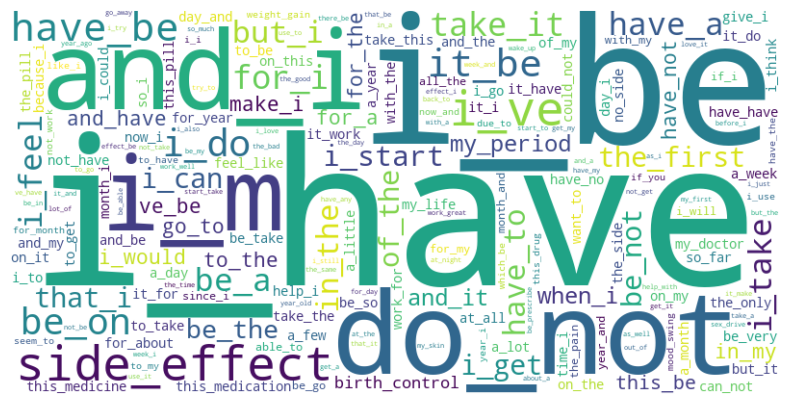

In [82]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white', min_word_length = 4).generate_from_frequencies(bigrams_tf_idf)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

This analysis is not much effective in this case.

In [67]:
importlib.reload(tf_idf)

<module 'tf_idf' from '/Users/yatharth/Documents/RND4IMPACT/Projects/tf_idf.py'>

In [ ]:
from nltk.util import ngrams
from collections import Counter

# Generate bigrams
# def generate_bigrams(tokens_list):
#     bigrams_list = []
#     for tokens in tokens_list:
#         tokens = text.split()
#         bigrams_list.extend(list(ngrams(tokens, 2)))
#     return ['_'.join(bigram) for bigram in bigrams]
#     # return bigrams_list
# Create bigrams

def create_bigrams(texts):
    # print(texts)
    # for doc in nlp.pipe(texts, batch_size= 10):
    #     print(doc)
    for doc in nlp.pipe(texts):
        # tokens = [token.text for token in doc]  # Extract tokens
        for token in doc:
            print(token)


    # bigrams = list(ngrams(tokens, 2))
        # return ['_'.join(bigram) for bigram in bigrams]

# df_spacy['prep_review_pipe_bigrams']  = df_spacy['prep_review_pipe'].apply(create_bigrams)
df_spacy['prep_review_pipe'][:1].apply(lambda x: create_bigrams(x))

# bigrams = generate_bigrams(df_spacy['custom_prep_review_pos_tokens'][:1])